In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

!pip install xgboost
import xgboost as xgb

!pip install lightgbm
from lightgbm import LGBMRegressor

!pip install catboost
from catboost import CatBoostRegressor

!pip install optuna
import optuna

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 400)

plt.style.use('seaborn-v0_8-deep')

%matplotlib inline

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# **FUNCTIONS**

## **Scatter Plot**

In [5]:
def PlotScatter(x, y, title, xunit, yunit, format_x, x_size):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    plt.scatter(x, y, alpha=0.7)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)
    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    if (format_x == 1):
        plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)
    plt.show()
    plt.close()

## **Box Plot**

In [7]:
def PlotBoxPlot(df_x, df_y, title, yunit):
    plt.figure(figsize=(6, 5))
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.boxplot(x = df_x, y = df_y, palette = "mako")

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel("", fontsize = 1)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    plt.show()
    plt.close()

In [8]:
def PlotBoxPlotV2(df_x, df_y, title, yunit, size_x, size_y):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.boxplot(x = df_x, y = df_y, palette = "mako")

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel("", fontsize = 1)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    plt.gcf().set_size_inches(size_x, size_y)

    plt.show()
    plt.close()

## **Regression Plot**

In [10]:
def PlotRegPlot(df_x, df_y, title, xunit, yunit):
    plt.figure(figsize=(6, 5))
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.regplot(x = df_x, y = df_y, line_kws={"color": "#31273F"})

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

    plt.show()
    plt.close()

In [11]:
def PlotRegPlot2(df_x, df_y, title):
    plt.figure(figsize=(6, 5))
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")
    
    plt.title(title)
    sns.regplot(x = df_x, y = df_y, line_kws={"color": "#31273F"})
    
    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel("US$", fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)
    plt.gca().set_xlabel("", fontsize = 10)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    plt.xlim(0,)
    plt.ylim(0,)

    plt.show()
    plt.close()

## **Histogram**

In [13]:
def HistPlot(x, title, xunit, x_size):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.histplot(x = x)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(0.98, -0.08)

    plt.ylabel("Count")

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)

    plt.show()
    plt.close()

## **Predicted vs Actual Values**

In [15]:
def PlotFitted(y_test, yhat, title):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")
    
    plt.title(title)

    y_test1 = np.exp(y_test)
    yhat1 = np.exp(yhat)

    sns.scatterplot(x=y_test1.to_numpy().flatten(), y=yhat1, alpha=0.6)
    plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'r--')

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")
    
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

    plt.gcf().set_size_inches(7, 5)

    plt.ylim(0,)
    plt.xlim(0,)
    
    plt.show()
    plt.close()
    
    
    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))

In [16]:
def PlotFittedV(yhat, y_test, model, x_data, y_data, title, xlabel):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)

    ax2 = sns.distplot(y_test, hist=False, color="r", label = "Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Predicted Value", ax = ax2)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.ylabel("Density")
    plt.xlabel(xlabel)
    plt.legend(['Actual Value', 'Predicted Value'], framealpha=0)

    plt.gcf().set_size_inches(7, 5)

    plt.show()
    plt.close()

    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))
    print("- Cross-Validation Score:", cross_val_score(model, x_data, y_data, cv=5).mean())

In [17]:
def PlotFittedV2(yhat, y_test, title, xlabel):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)

    ax2 = sns.distplot(np.exp(y_test), hist=False, color="r", label = "Actual Value")
    sns.distplot(np.exp(yhat), hist=False, color="b", label="Predicted Value", ax = ax2)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.ylabel("Density")
    plt.xlabel(xlabel)
    plt.legend(['Actual Value', 'Predicted Value'], framealpha=0)

    plt.gcf().set_size_inches(7, 5)

    plt.show()
    plt.close()

    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))

## **Line Plot**

In [19]:
def PlotLine(y, title, yunit, x_size, y_size):
  plt.figure().patch.set_facecolor("0.85")
  plt.axes().set(facecolor = "0.85")

  plt.title(title)
  plt.plot(y)

  plt.grid(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_color("black")
  plt.gca().spines['left'].set_color("black")

  plt.gca().set_xlabel("", fontsize = 0)
  #plt.gca().xaxis.set_label_coords(1.05, -0.025)
  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

  plt.gcf().set_size_inches(x_size, y_size)

  plt.show()
  plt.close()

## **K-Fold Target Encoding**

In [21]:
def KFTE(df, df_test, categ_f, target):
  kf = KFold(n_splits = 5, shuffle = True, random_state = 13)

  nome = categ_f + "_E"

  df[nome] = 0.0

  for train_idx, val_idx in kf.split(df):
      fold_train = df.iloc[train_idx]
      fold_valid  = df.iloc[val_idx]

      medias_feature = fold_train.groupby(categ_f)[target].mean()
      media_global = fold_train[target].mean()

      feature_encoded = fold_valid[categ_f].map(medias_feature).fillna(media_global)
      df.loc[val_idx, nome] = feature_encoded

  mapping = df.groupby(categ_f)[target].mean().to_dict()
  global_mean = df[target].mean()

  df_test[categ_f] = df_test[categ_f].map(mapping).fillna(global_mean)

# **DATASET LOADING**

In [23]:
yhat_train_lgbm = pd.read_csv('../data/processed/3.Modeling_lgbm_train.csv')
yhat_train_xgbr = pd.read_csv('../data/processed/3.Modeling_xgbr_train.csv')
yhat_train_cbr = pd.read_csv('../data/processed/3.Modeling_cbr_train.csv')
yhat_train_gbr = pd.read_csv('../data/processed/3.Modeling_gbr_train.csv')

yhat_lgbm_op = pd.read_csv('../data/processed/3.Modeling_lgbm_yhat.csv')
yhat_xgbr_op = pd.read_csv('../data/processed/3.Modeling_xgbr_yhat.csv')
yhat_cbr_op = pd.read_csv('../data/processed/3.Modeling_cbr_yhat.csv')
yhat_gbr_op = pd.read_csv('../data/processed/3.Modeling_gbr_yhat.csv')

y_train = pd.read_csv('../data/processed/3.Modeling_y_train.csv')
y_test = pd.read_csv('../data/processed/3.Modeling_y_test.csv')

submission = pd.read_csv('../data/processed/2.2.EDA_submission.csv')
yhat_test_lgbm = pd.read_csv('../data/processed/3.Modeling_xgbr_test.csv')
yhat_test_xgbr = pd.read_csv('../data/processed/3.Modeling_xgbr_test.csv')
yhat_test_cbr = pd.read_csv('../data/processed/3.Modeling_xgbr_test.csv')
yhat_test_gbr = pd.read_csv('../data/processed/3.Modeling_xgbr_test.csv')

i = pd.read_csv('../data/processed/3.Modeling_comparison.csv')

## **STACKING MODEL**

In [25]:
i

,RSME,RSME Tuned
0,0.117613,0.113286
1,0.126398,0.115464
2,0.110593,0.109030
3,0.118464,0.114717


In [26]:
stacked_train = np.column_stack([
    yhat_train_lgbm,
    yhat_train_xgbr,
    yhat_train_cbr,
    yhat_train_gbr
])

stacked_test = np.column_stack([
    yhat_lgbm_op,
    yhat_xgbr_op,
    yhat_cbr_op,
    yhat_gbr_op
])

### **XGBOOST STACKING MODEL**

#### **MODEL DEVELOPMENT**

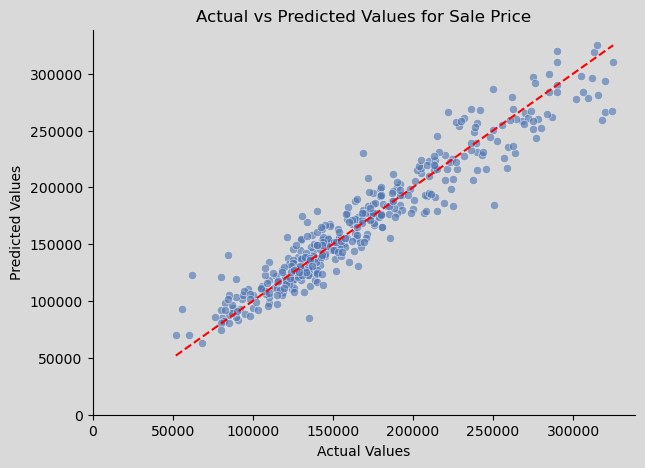


- Mean Squared Error: 0.012070554535098177
- Root Mean Squared Error: 0.10986607545142485


In [29]:
xgb_st = xgb.XGBRegressor(
    n_estimators=500, 
    learning_rate=0.05, 
    max_depth=5, 
    subsample=0.8, 
    colsample_bytree=0.8,
    random_state=42
)

xgb_st.fit(stacked_train, y_train)
yhat_stacking = xgb_st.predict(stacked_test)

PlotFitted(y_test, yhat_stacking, "Actual vs Predicted Values for Sale Price")

#### **MODEL REFINEMENT**

In [ ]:
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
    }

    model = xgb.XGBRegressor(**params, random_state=13)
    model.fit(stacked_train, y_train)
    y_pred = model.predict(stacked_test)
    return root_mean_squared_error(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

print('\n\nBest trial:', study.best_trial.params)

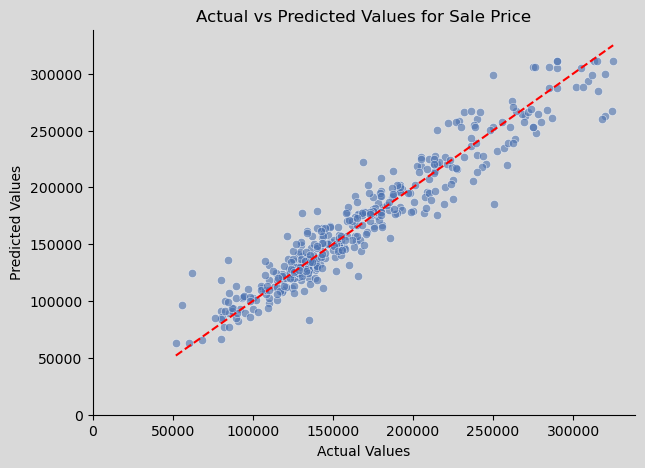


- Mean Squared Error: 0.01177715713720447
- Root Mean Squared Error: 0.10852261117944255


In [31]:
xgb_st_op = xgb.XGBRegressor(
    max_depth = 3,
    learning_rate = 0.07626170326360641,
    n_estimators = 1846,
    min_child_weight = 10,
    gamma = 0.010351140560914473,
    subsample = 0.5022396861003908,
    colsample_bytree = 0.9229406483842264,
    reg_alpha = 0.0122222411454177,
    reg_lambda = 7.344957865888092
)

xgb_st_op.fit(stacked_train, y_train)
yhat_stacking_op = xgb_st_op.predict(stacked_test)

PlotFitted(y_test, yhat_stacking_op, "Actual vs Predicted Values for Sale Price")

# **PREDICTING TEST DATASET**

In [51]:
stacked_test_final = np.column_stack([
    yhat_test_lgbm,
    yhat_test_xgbr,
    yhat_test_cbr,
    yhat_test_gbr
])

In [55]:
submission['SalePrice'] = np.exp(xgb_st_op.predict(stacked_test_final).flatten())
submission = submission.set_index("Id")
submission.to_csv('../data/processed/submission.csv')

# **AUTHOR**

## Fábio Galdino